# Dinâmica da Partícula
Professor Paulo Victor <br>
E-mail: paulo.gomes@cefet-rj.br <br>
CEFET-RJ Campus Angra dos Reis Sala 6E

## Introdução

No Natal de 1642, o ano que Galileu morreu,em Londres, nasceu um pequenino bebê, chamado de Isaac, filho de Isaac e Hanna Newton. E assim nasceu o pai da Mecânica. 
Em 1665, Newton era um estudante da Universidade de Cambridge, neste ano a a Inglaterra foi assolada por uma epidemia de peste bubônica, forçando uma quarentena de dois anos. Nesse período, o jovem de 23 anos concebeu a lei da gravitação, as leis de movimentos e desenvolveu os conceitos básicos do cálculo diferencial. Devido a pequenas discrepâncias em sua explicação sobre o movimento da lua, Newton engavetou todos esses trabalhos por 20 anos. <br>
É dado a Edmund Halley, descobridor do cometa Halley, o crédito de trazer as descobertas de Newton a conhecimento público. Um dia, em 1685, Halley conversava casualmente com Cristopher Wren e Robert Hooke sobre a teoria de Descartes que explicava o movimento dos planetas. Insatisfeitos com essa teoria, eles especulavam se não existiria uma força similar ao magnetismo que faria com que os planetas se movessem em órbitas elípticas. Hooke fez uma aposta com Wren que conseguiria formar uma teoria que explicasse essa especulação em duas semanas. Vários meses depois, Halley visitou Newton em Cambridge e, sem mencionar a aposta, casualmente perguntou: "Se o sol puxasse os planetas com uma força inversamente proporcional ao quadrado da distância, qual trajetória os planetas percorreriam?" Para a surpresa de Halley, Newton respondeu sem exitar: "Órbitas elípticas, é claro, por quê? Eu já até fiz esses cálculos e eu tenho a prova entre as minhas anotações em alguma gaveta por aqui. Me dê alguns dias que eu vou procurar isso e te mostro." As anotações as quais Newton se referia, eram essas que ele escreveu durante a quarentena de 1685 e ficaram engavetadas por 20 anos. <br>
Alguns dias depois, Newton mostrou as anotações a Halley. Após se recuperar do choque, Halley aconselhou o amigo a desenvolver esses estudos completamente e a publicá-los. Dois anos depois, em 1987, Newton publicou o livro *Philosophiæ Naturalis Principia Mathematica* (Princípios Matemáticos da Filosofia Natural), ou simplesmente *Principia*. Esse livrou lançou as bases para a Mecânica Clássica e foi de fundamental importância para muitos avanços da primeira revolução industrial. 

### Leis de Newton
1. Todo corpo continua em seu estado de repouso ou de movimento uniforme em linha reta a menos que seja compelido a mudar de estado devido a forças sobre ele impressas. 
2. A taxa  de mudança da quantidade de movimento linear é proporcional à força impressa e está na mesma direção desta força.
3. A toda ação, sempre existe uma reação em sentido oposto e igual intensidade. 

## Vetor Quantidade de Movimento Linear

Podemos definir o **vetor quantidade de movimento linear** da partícula $P$ como:
$$ {}^{N} \vec{G} {}^{P} = m {}^{N} \vec{v}{}^{P} $$
* Na ausência de forças externas, o vetor quantidade de movimento se conserva (**1 Lei de Newton**).

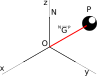

In [1]:
from IPython.display import SVG
SVG('partícula01G.svg')

In [2]:
import sympy as sy
import sympy.physics.mechanics as me

In [3]:
x,y,z = me.dynamicsymbols('x y z')
m = sy.symbols('m')

In [4]:
N = me.ReferenceFrame('N')

In [5]:
O = me.Point('O')
O.set_vel(N,0)

In [6]:
P = me.Point('P')
pPO = x*N.x + y*N.y + z*N.z
P.set_pos(O,pPO)
P.set_vel(N,pPO.dt(N))

In [7]:
P.vel(N)

x'*N.x + y'*N.y + z'*N.z

In [8]:
P.acc(N)

x''*N.x + y''*N.y + z''*N.z

Vamos informar ao python que iremos utilizar o modelo de partícula:

In [9]:
ParP = me.Particle('ParP',P,m)

O **vetor quantidade de movimento linear** da partícula $P$ em relação a $N$, ${}^{N} \vec{G}{}^{P}$, pode ser obtido automaticamente:

In [10]:
ParP.linear_momentum(N)

m*x'*N.x + m*y'*N.y + m*z'*N.z

É conveniente guardar essa informação em uma variável:

In [11]:
G_P = ParP.linear_momentum(N)
G_P

m*x'*N.x + m*y'*N.y + m*z'*N.z

### Exemplo 1:

Um carro foguete se move ao longo de uma pista reta de acordo com a equação $x = 3t^3 + t + 2$, onde $x$ está em metros e $t$ em segundos. A estrutura do carro foguete possui a massa $m_{car}$ e suponha que a massa do combustível é consumida segundo a equação $m_f = 250e^{-5t}$. Obtenha o vetor quantidade de movimento linear do carro foguete.

In [12]:
t = me.dynamicsymbols._t

In [13]:
s = 3*t**3 + t + 2

In [14]:
mcar = sy.symbols('m_car')

In [15]:
v = s.diff(t)
v

9*t**2 + 1

In [16]:
mf = 250*sy.E**(-0.5*t)
mf

250*exp(-0.5*t)

In [30]:
250*sy.exp(-0.5*t)

250*exp(-0.5*t)

Embora seja um problema undimensional, vamos criar uma base vetorial para usarmos os comandos que aprendemos.

In [17]:
N = me.ReferenceFrame('N')

In [18]:
O = me.Point('O')
O.set_vel(N,0)

In [19]:
F = me.Point('F')
F.set_pos(O,s*N.x)
F.set_vel(N,v*N.x)

In [20]:
ParF = me.Particle('ParF',F,mf+mcar)

In [21]:
G_F = ParF.linear_momentum(N)
G_F

(m_car + 250*exp(-0.5*t))*(9*t**2 + 1)*N.x

## Segunda Lei de Newton

Podemos entender a segunda lei de Newton como: 
* A variação no tempo do vetor quantidade de movimento linear é igual ao vetor resultante das forças aplicadas ao sistema.

Para uma partícula $P$ submetida a $n$ forças, podemos escrever matematicamente a segunda lei de Newton como:

$$\sum^{n}_{i=1} \vec{F}_{i} = \dfrac{{}^{N} d {}^{N} \vec{G}{}^{P}}{dt}$$

Onde ${}^{N} \vec{G}{}^{P} = m {}^{N}\vec{v} {}^{P} $ e $N$  é um sistema de referência inercial. 

Por enquanto, o nosso sistema se resume a uma única partícula. Observa-se que tudo o que for aprendido na dinâmica de partículas poderá ser extendido para a dinâmica de sistemas de partículas e dinâmica de corpos rígidos. 

### Exemplo 2:
Voltando ao sistema do **Exemplo 1**, obtenha uma expressão para a resultande das forças atuantes no carro foguete.

In [22]:
G_F

(m_car + 250*exp(-0.5*t))*(9*t**2 + 1)*N.x

In [23]:
Res_F = G_F.dt(N)
Res_F

(18*t*(m_car + 250*exp(-0.5*t)) - 125.0*(9*t**2 + 1)*exp(-0.5*t))*N.x

In [24]:
Res_F_esc = Res_F.dot(N.x).subs(mcar,500)
Res_F_esc

18*t*(500 + 250*exp(-0.5*t)) - 125.0*(9*t**2 + 1)*exp(-0.5*t)

In [25]:
from numpy import linspace
import matplotlib.pyplot as plt

In [26]:
lam_x = sy.lambdify(t,Res_F_esc,modules = ['numpy'])
x_vals = linspace(0,5,100)
y_vals = lam_x(x_vals)

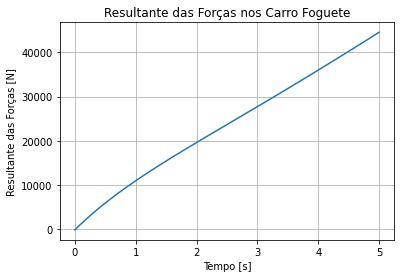

In [27]:
plt.figure()
plt.plot(x_vals,y_vals)
plt.xlabel('Tempo [s]')
plt.ylabel('Resultante das Forças [N]')
plt.title('Resultante das Forças nos Carro Foguete')
plt.grid(True)

## Cinética

A **Cinética** é o estudo das forças que causam o movimento. Estudaremos as seguintes modelagens de forças: 
* Gravitacionais
* Eletroestáticas
* Magnéticas
* De contato entre superfícies sólidas
* De atrito seco (forças de atrito de Coulomb)
* Exercidas por fluidos
* Exercidas por cabos flexíveis e barras rígidas
* Exercidas por molas
* Exercidas por amortecedores viscosos

Forças são **grandezas vetorias**. Modelamos forças como vetores deslizantes.

### Vetores Vinculados, Deslizantes e Livres
* Vetores Vinculados:
    - A caracterização de um vetor vinculador requer a descrição de seus componentes em uma dada base e as coordenadas de seu ponto de aplicação. Exemplo: velocidade de uma partícula.
* Vetores Deslizantes:
    - O efeito da ação de uma força sobre um corpo rígido depende da sua linha de ação. Duas forças com os mesmos componentes vetoriais, mas com linhas de ação diferentes são forças diferentes. A caracterização de um vetor deslizante requer a descrição dos seus componentes em uma dada base e a descrição da reta suporte. Exemplo: força aplicada sobre um corpo rígido. 
* Vetores Livres: 
    - Sua localização no espaço não importa. Exemplo: velocidade angular e torque.

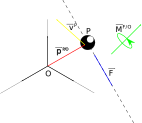

In [28]:
SVG('partícula02.svg')

### Forças Gravitacionais
